# Research Questions

## RQ1: How does the numeric rating/score of reviews affect the booking rates of listings?

- handle missing values (henry)
- coorelation analysis (Brandon)
- histogram/scatterplot for some key variables 
- summary stats (nawal)


1) If your research questions have been updated from the proposal. What's your new research questions?
2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 
3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 
4) Update the member contribution section based on progress so far.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(20386, 75)
(8056, 75)
(39202, 75)
(91778, 75)
(25480, 75)
(511139, 6)
(378989, 6)
(986810, 6)
(1649190, 6)
(560773, 6)


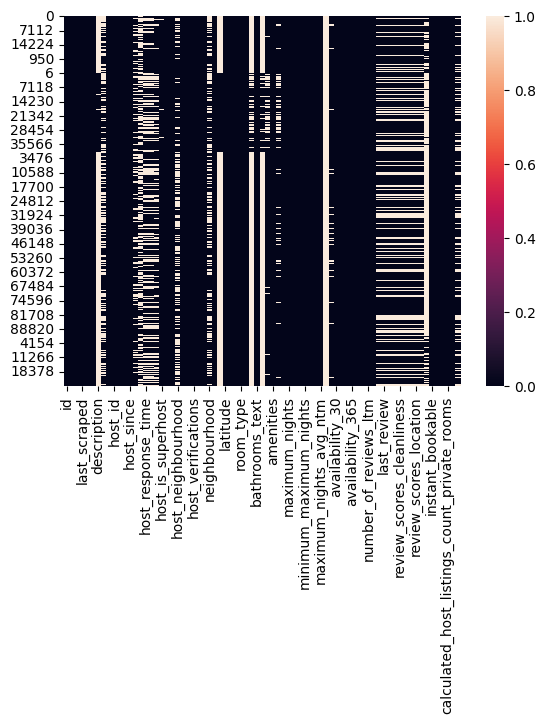

In [2]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)
            print(d.shape)

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

def visualize_missing_values(df):
    sns.heatmap(df.isnull())
    
combine_data()

visualize_missing_values(listings)

In [3]:


listings['price']

0           $45.00
1          $180.00
2           $34.00
3           $45.00
4           $63.00
           ...    
25475      $217.00
25476    $1,689.00
25477      $920.00
25478      $429.00
25479      $203.00
Name: price, Length: 184902, dtype: object

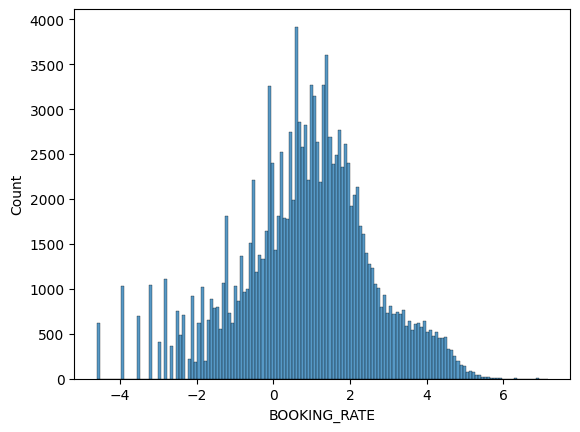

In [22]:
short_term_listings = listings[listings['minimum_nights_avg_ntm'] < 100]
short_term_listings = short_term_listings[short_term_listings['reviews_per_month'] < 20]


short_term_listings['BOOKING_RATE'] = np.log(short_term_listings['minimum_nights'] * short_term_listings['reviews_per_month'])
# sns.histplot(short_term_listings['reviews_per_month'])
sns.histplot(short_term_listings['BOOKING_RATE'])
plt.show()



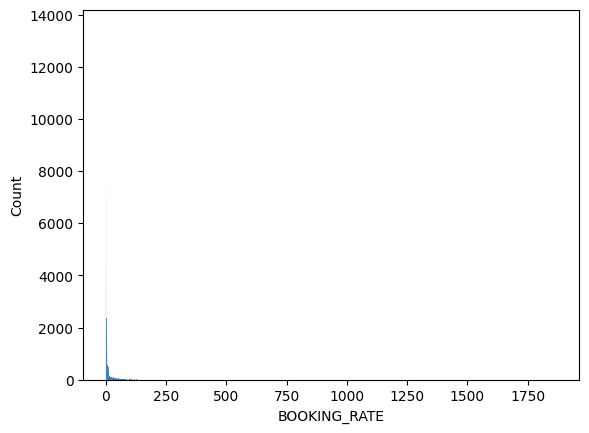

In [5]:

# WITHOUT LOG

listings['BOOKING_RATE'] = listings['minimum_nights'] * listings['reviews_per_month']
sns.histplot(listings['BOOKING_RATE'])
plt.show()

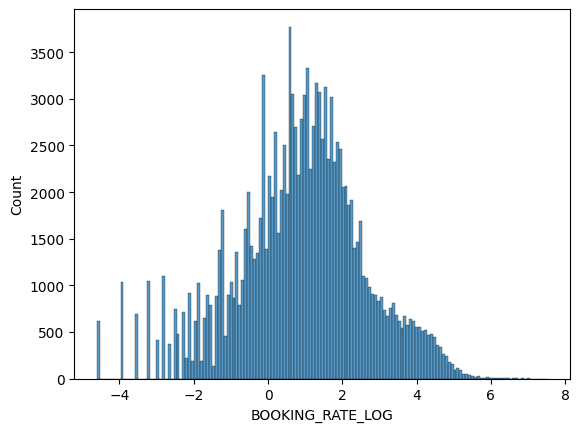

In [6]:
# listings['BOOKING_RATE'] = listings['minimum_nights_avg_ntm'] * listings['reviews_per_month']

# WITH LOG
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'])
sns.histplot(listings['BOOKING_RATE_LOG'])
plt.show()


In [8]:
# sns.scatterplot(data=listings, x='review_scores_rating', y='BOOKING_RATE_LOG')
# plt.scatter(listings['r?eview_scores_rating'], listings['BOOKING_RATE_LOG'])
plt.show()

In [10]:
# List of column names you want to include in the correlation analysis
columns_to_include = ['accommodates', 'beds', 'minimum_nights', 'maximum_nights', 
                        'availability_30', 'availability_60', 'availability_90', 
                        'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                        'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                        'review_scores_location', 'review_scores_value']

# Select only the specified columns
listings_selected = listings[columns_to_include]

# Now compute the correlation matrix for the selected columns
correlation_matrix = listings_selected.corr()
print(correlation_matrix)

                             accommodates      beds  minimum_nights  \
accommodates                     1.000000  0.829580       -0.054365   
beds                             0.829580  1.000000       -0.023127   
minimum_nights                  -0.054365 -0.023127        1.000000   
maximum_nights                  -0.003002 -0.001679        0.000430   
availability_30                  0.050773  0.022939       -0.007400   
availability_60                  0.060242  0.030320       -0.032761   
availability_90                  0.060660  0.030618       -0.040488   
availability_365                 0.075346  0.048766       -0.018979   
number_of_reviews               -0.021210 -0.018633       -0.065132   
number_of_reviews_ltm            0.006906 -0.001841       -0.134621   
number_of_reviews_l30d           0.014883 -0.001036       -0.142477   
review_scores_rating             0.008009  0.006940       -0.013197   
review_scores_accuracy          -0.008136 -0.007572       -0.002648   
review

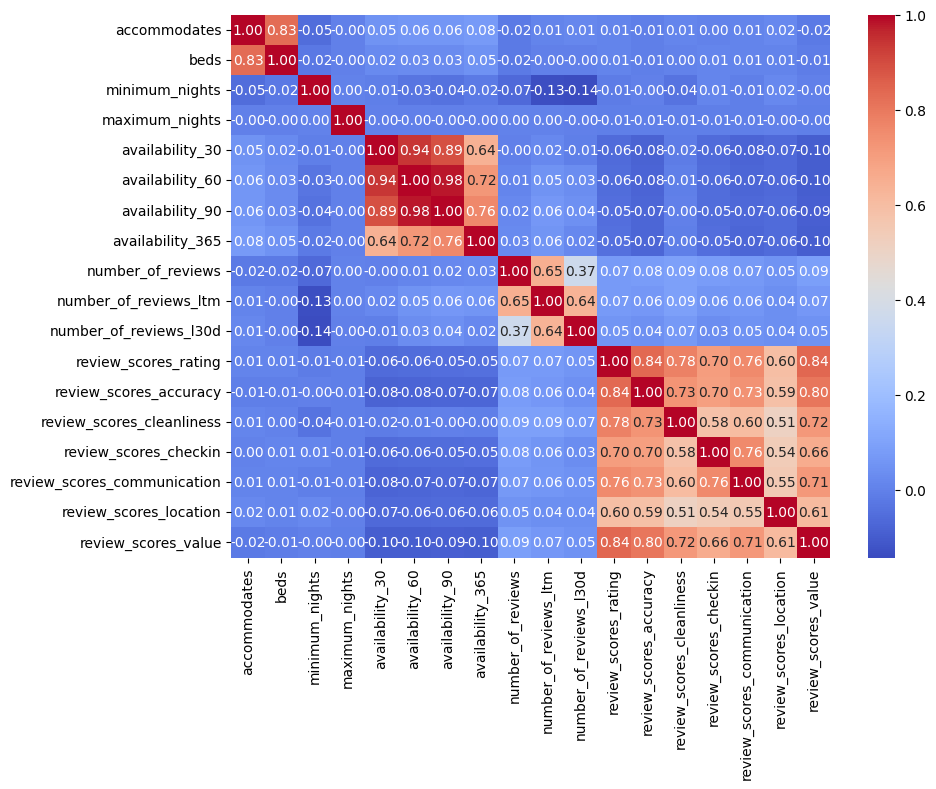

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

<Axes: ylabel='minimum_nights_avg_ntm'>

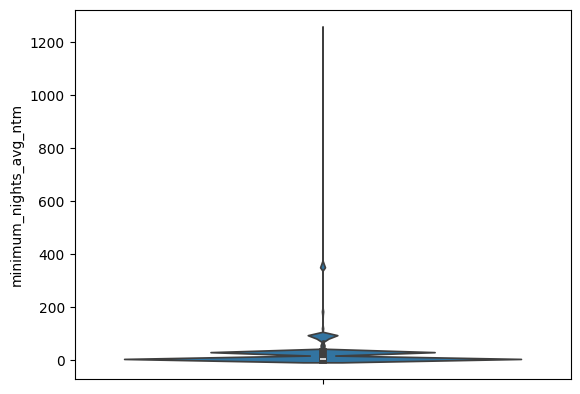

In [16]:
sns.violinplot(listings['minimum_nights_avg_ntm'])

In [ ]:
def get_full_summary(df, exclude_columns=None):
    
    if exclude_columns is None:
        exclude_columns = []
    
    # Exclude specified columns
    df_filtered = df.drop(columns=exclude_columns)
    
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df_filtered.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df_filtered.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df_filtered.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns, excluding specified columns
    categorical_summary = df_filtered.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}


# Specify columns to exclude
exclude_columns = ['id', 'listing_url', 'scrape_id', 'host_id', 'host_url', 
                       'host_thumbnail_url', 'host_picture_url', 'name', 'description', 
                       'neighborhood_overview', 'host_about', 'amenities', 'bathrooms_text', 
                       'last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 
                       'last_review', 'source', 'host_neighbourhood', 'calendar_updated', 'license', 'picture_url']
full_summary = get_full_summary(reviews, None)

print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

In [ ]:
def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()



In [ ]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analyze_data_cleaning_needs(listings)

In [ ]:
def plot_scatter(df, column_x, column_y):
  
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(df[column_x], df[column_y], alpha=0.5)  # Create scatter plot with some transparency
    plt.title(f'Scatter Plot of {column_x} vs. {column_y}')  # Set the title of the plot
    plt.xlabel(column_x)  # Set the x-axis label
    plt.ylabel(column_y)  # Set the y-axis label
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

plot_scatter(listings, 'reviews_per_month', 'availability_30')


In [ ]:
#aggregate scores togther 
# Filter out the relevant score columns
score_columns = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

# Create a new DataFrame with only the score columns
scores_df = df[score_columns]

# Calculate the average score for each listing
# replace NaN with the column mean (considering only non-missing values for each score)
scores_df.fillna(scores_df.mean(), inplace=True)

# Calculate the aggregated score as the mean across the columns for each row
df['aggregated_score'] = scores_df.mean(axis=1)

# Inspect the new DataFrame with the aggregated score
print(df[['id', 'aggregated_score']].head())


In [ ]:
print(df[[
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Let's assume 'df' is your DataFrame and it has been loaded with your dataset
# Replace 'your_dataframe' with the actual variable name of your DataFrame

# Replace the column names with the actual column names from your DataFrame
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

listings_withReviews = listings.dropna(subset=independent_vars + [dependent_var])

# Split the data into independent X and dependent y variables
X = listings_withReviews[independent_vars]
y = listings_withReviews[dependent_var]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the booking rates with the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model evaluation
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
print(lr.summary())

In [ ]:
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]


## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

## RQ3: How do the latency of host responses and communcation rating impact booking rate?

In [84]:
# preparing dataframe for 3rd research question

relevant_columns_rq3 = [
    'id',
    'review_scores_communication',
    'host_response_time',
    'BOOKING_RATE_LOG'
]

rq3 = listings[relevant_columns_rq3]

# filter out null values, since we need all 3 to compute
rq3 = rq3.dropna(subset=['review_scores_communication', 'BOOKING_RATE_LOG'])

def map_response_time(response_catagory):
    if response_catagory == 'within an hour':
        return 1
    elif response_catagory == 'within a few hours':
        return 5 # few = max five hours
    elif response_catagory == 'within a day':
        return 24
    elif response_catagory == 'a few days or more':
        return 72 # estimated of 3 days 
    
    return -1 # -1 meaning we don't know

rq3['HOST_RESPONSE_TIME_SCORED'] = rq3['host_response_time'].apply(map_response_time)


([<matplotlib.patches.Wedge at 0x1c289091c60>,
 [Text(0.1234982804633956, 1.093045367184082, ''),
  Text(-0.7513301415570073, -0.8034320247462927, ''),
  Text(0.6767874489743232, -0.8671555505852615, ''),
  Text(1.0422581702214413, -0.35170713186777053, ''),
  Text(1.0982284982642203, -0.06240324991789658, '')],
 [Text(0.06736269843457941, 0.5962065639185902, '46.4%'),
  Text(-0.40981644084927665, -0.4382356498616142, '33.2%'),
  Text(0.36915679034963084, -0.4729939366828699, '11.8%'),
  Text(0.5685044564844225, -0.19184025374605662, '6.7%'),
  Text(0.5990337263259383, -0.03403813631885268, '1.8%')])

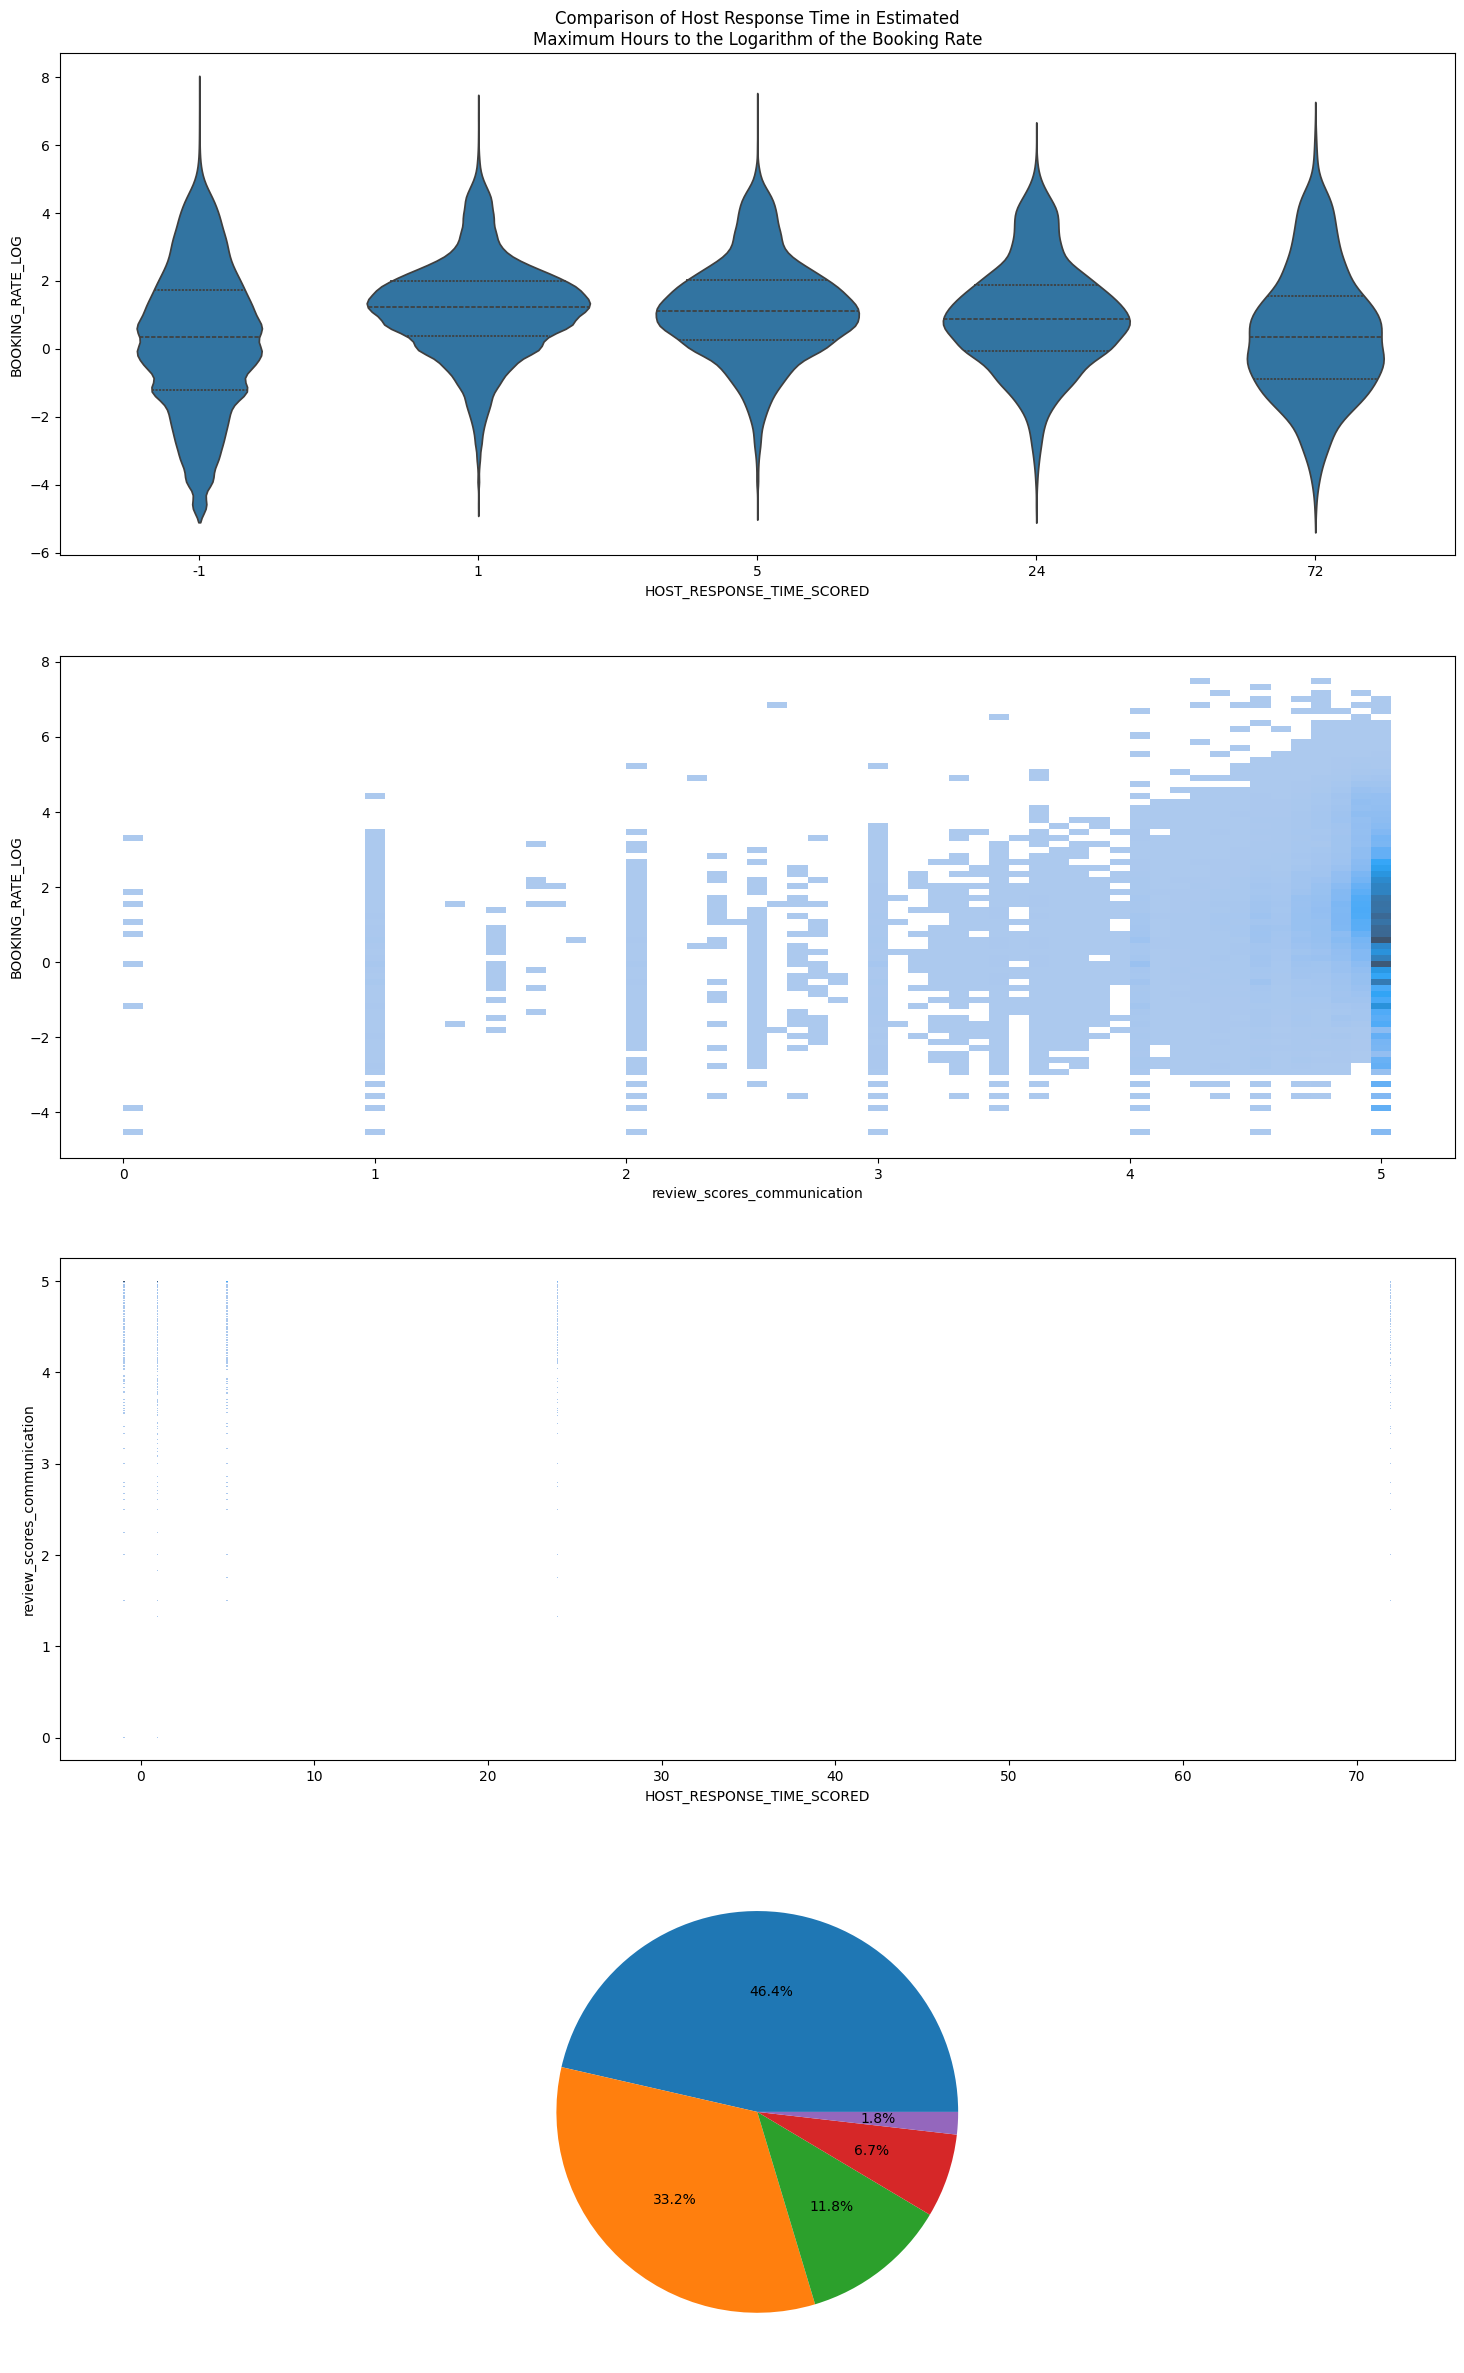

In [103]:
fig, ax = plt.subplots(4, 1, figsize=(18, 30))

sns.violinplot(rq3, ax=ax[0], x='HOST_RESPONSE_TIME_SCORED', y='BOOKING_RATE_LOG', inner='quart')
ax[0].set_title('Comparison of Host Response Time in Estimated\nMaximum Hours to the Logarithm of the Booking Rate')

sns.histplot(rq3, ax=ax[1], x='review_scores_communication', y='BOOKING_RATE_LOG', binwidth=(0.08, 0.16))


sns.histplot(rq3, ax=ax[2], x='HOST_RESPONSE_TIME_SCORED', y='review_scores_communication')

response_counts = rq3['host_response_time'].value_counts(dropna=False)
plt.pie(response_counts, autopct='%1.1f%%')


<Axes: ylabel='count'>

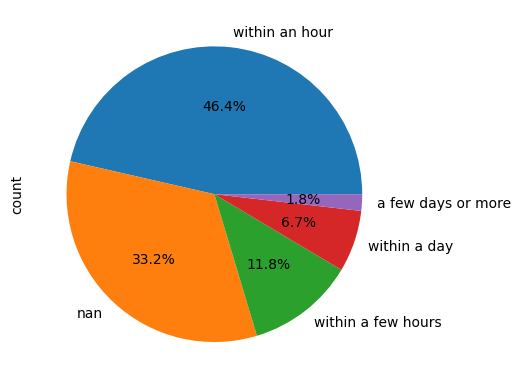

In [99]:
# uniques = rq3['host_response_time'].unique()

# rq3['host_response_time'] == uniques

# rq3['host_response_time'].value_counts(dropna=False).reindex(['3', 'within an hour', 'within a few hours', 'within a day', 'a few days or more'], fill_value=0)




